<a href="https://colab.research.google.com/github/NishaMDev/DeepLearning/blob/main/Assignment%232/DL_Pytorch_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment#2 - Practicing Tensor Operations usinf Pytorch**

 ***Author - Nisha Mohan Devadiga***

In [1]:
import torch
import numpy as np  

# Initializing a Tensor

Tensors can be initialized in various ways

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred

In [2]:
data = [[1,2],[3,4]]

x_data = torch.tensor(data)

x_data

tensor([[1, 2],
        [3, 4]])

**From a NumPy array**

Tensors can be created from NumPy arrays

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

x_np

tensor([[1, 2],
        [3, 4]])

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [4]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data,dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8803, 0.3798],
        [0.5421, 0.5024]]) 



**With random or constant values:**

In [5]:
shape = (2,3,)

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeroes Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.5316, 0.4945, 0.8346],
        [0.7484, 0.1957, 0.7827]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeroes Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



# Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Operations on Tensors

In [7]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

Standard numpy-like indexing and slicing:

In [8]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors**

You can use torch.cat to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining op that is subtly different from torch.cat.

In [9]:
t1 = torch.cat([tensor,tensor,tensor], dim=1)
print(t1)


tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Arithmetic operations**

In [10]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [11]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

**Single-element tensors** 

If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item():

In [12]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


**In-place operations** 

Operations that store the result into the operand are called in-place. They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.

In [13]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


**TORCH.COLUMN_STACK**

Creates a new tensor by horizontally stacking the tensors in tensors.

In [14]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

torch.column_stack((a, b))

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [15]:
a = torch.arange(5)
print(f"a: {a} \n")
b = torch.arange(10).reshape(5, 2)
print(f"b: {b} \n")

torch.column_stack((a, b, b))

a: tensor([0, 1, 2, 3, 4]) 

b: tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]) 



tensor([[0, 0, 1, 0, 1],
        [1, 2, 3, 2, 3],
        [2, 4, 5, 4, 5],
        [3, 6, 7, 6, 7],
        [4, 8, 9, 8, 9]])

**TORCH.DSTACK**

Stack tensors in sequence depthwise (along third axis).

In [16]:
a = torch.tensor([1, 2, 3])

b = torch.tensor([4, 5, 6])

torch.dstack((a,b))

tensor([[[1, 4],
         [2, 5],
         [3, 6]]])

In [17]:
a = torch.tensor([[1],[2],[3]])
b = torch.tensor([[4],[5],[6]])
torch.dstack((a,b))

tensor([[[1, 4]],

        [[2, 5]],

        [[3, 6]]])

**TORCH.HSTACK**

Stack tensors in sequence horizontally (column wise).

This is equivalent to concatenation along the first axis for 1-D tensors, and along the second axis for all other tensors.

In [18]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
torch.hstack((a,b))


tensor([1, 2, 3, 4, 5, 6])

In [19]:
a = torch.tensor([[1],[2],[3]])
b = torch.tensor([[4],[5],[6]])
torch.hstack((a,b))

tensor([[1, 4],
        [2, 5],
        [3, 6]])

**TORCH.VSTACK**

Stack tensors in sequence vertically (row wise).

This is equivalent to concatenation along the first axis after all 1-D tensors have been reshaped by torch.atleast_2d()

In [20]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
torch.vstack((a,b))


tensor([[1, 2, 3],
        [4, 5, 6]])

In [21]:
a = torch.tensor([[1],[2],[3]])
b = torch.tensor([[4],[5],[6]])
torch.vstack((a,b))

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

**Random sampling**

Sets the seed for generating random numbers to a non-deterministic random number. Returns a 64 bit number used to seed the RNG.

In [22]:
torch.seed()

13533127216589544896

**In-place random sampling**
There are a few more in-place random sampling functions defined on Tensors as well. 

torch.Tensor.bernoulli_() - in-place version of torch.bernoulli()

torch.Tensor.cauchy_() - numbers drawn from the Cauchy distribution

torch.Tensor.exponential_() - numbers drawn from the exponential distribution

torch.Tensor.geometric_() - elements drawn from the geometric distribution

torch.Tensor.log_normal_() - samples from the log-normal distribution

torch.Tensor.normal_() - in-place version of torch.normal()

torch.Tensor.random_() - numbers sampled from the discrete uniform distribution

torch.Tensor.uniform_() - numbers sampled from the continuous uniform distribution

# Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

# Tensor to NumPy array

In [23]:
t = torch.ones(5)
print(f"t: {t}")

n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.

In [24]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


# NumPy array to Tensor

In [25]:
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# **Practice from [Pytorch Doc](https://pytorch.org/docs/stable/torch.html)**

In [26]:
x=torch.tensor([1,2,3])  # Returns True if obj is a PyTorch tensor.
torch.is_tensor(x)

True

**Returns True if the input is a single element tensor which is not equal to zero after type conversions. i.e. not equal to torch.tensor([0.]) or torch.tensor([0]) or torch.tensor([False]). **

In [27]:
torch.is_nonzero(torch.tensor([0.]))

False

In [28]:
torch.is_nonzero(torch.tensor([1.5]))


True

**Initial default for floating point is torch.float32**
Python floats are interpreted as float32

In [29]:
torch.tensor([1.2, 3]).dtype

torch.float32

In [30]:
torch.tensor([1.2, 3j]).dtype

torch.complex64

In [31]:
torch.set_default_dtype(torch.float64)

**Get the current default floating point torch.dtype.**

In [32]:
torch.get_default_dtype()  #torch.set_default_tensor_type(torch.FloatTensor)

torch.float64

In [33]:
torch.set_default_dtype(torch.float64)

In [34]:
torch.get_default_dtype()   # default is now changed to torch.float64

torch.float64

In [35]:
# setting tensor type also affects this

torch.set_default_tensor_type(torch.FloatTensor)  

In [36]:
torch.get_default_dtype()  # changed to torch.float32, the dtype for torch.FloatTensor

torch.float32

In [37]:
torch.tensor([1.2, 3]).dtype    # initial default for floating point is torch.float32
torch.set_default_tensor_type(torch.DoubleTensor)
torch.tensor([1.2, 3]).dtype    # a new floating point tensor

torch.float64

**Returns the total number of elements in the input tensor.**

In [38]:
a = torch.randn(1, 2, 3, 4, 5)
torch.numel(a)


120

In [39]:
a = torch.zeros(4,4)
torch.numel(a)

16

Disables denormal floating numbers on CPU.

In [40]:
torch.set_flush_denormal(True)
torch.tensor([1e-323], dtype=torch.float64)


tensor([0.])

In [41]:
torch.set_flush_denormal(False)
torch.tensor([1e-323], dtype=torch.float64)

tensor([0.])

In [42]:
torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])



tensor([[0.1000, 1.2000],
        [2.2000, 3.1000],
        [4.9000, 5.2000]])

In [43]:
torch.tensor([0, 1])  # Type inference on data



tensor([0, 1])

In [44]:
torch.tensor([[0.11111, 0.222222, 0.3333333]],
             dtype=torch.float64,
             device=torch.device('cuda:0'))  # creates a torch.cuda.DoubleTensor



tensor([[0.1111, 0.2222, 0.3333]], device='cuda:0')

In [45]:
torch.tensor(3.14159)  # Create a scalar (zero-dimensional tensor)


tensor(3.1416)

In [46]:

torch.tensor([])  # Create an empty tensor (of size (0,))

tensor([])

**This function returns an uncoalesced tensor.**

In [47]:
i = torch.tensor([[0, 1, 1],
                  [2, 0, 2]])
v = torch.tensor([3, 4, 5], dtype=torch.float32)
torch.sparse_coo_tensor(i, v, [2, 4])


tensor(indices=tensor([[0, 1, 1],
                       [2, 0, 2]]),
       values=tensor([3., 4., 5.]),
       size=(2, 4), nnz=3, dtype=torch.float32, layout=torch.sparse_coo)

In [48]:

torch.sparse_coo_tensor(i, v)  # Shape inference



tensor(indices=tensor([[0, 1, 1],
                       [2, 0, 2]]),
       values=tensor([3., 4., 5.]),
       size=(2, 3), nnz=3, dtype=torch.float32, layout=torch.sparse_coo)

In [49]:
torch.sparse_coo_tensor(i, v, [2, 4],
                        dtype=torch.float64,
                        device=torch.device('cuda:0'))


tensor(indices=tensor([[0, 1, 1],
                       [2, 0, 2]]),
       values=tensor([3., 4., 5.]),
       device='cuda:0', size=(2, 4), nnz=3, layout=torch.sparse_coo)

In [50]:
S = torch.sparse_coo_tensor(torch.empty([1, 0]), [], [1])

In [51]:
S = torch.sparse_coo_tensor(torch.empty([1, 0]), torch.empty([0, 2]), [1, 2])

**Create a view of an existing torch.Tensor input with specified size, stride and storage_offset.**

torch.as_strided(input, size, stride, storage_offset=0) → Tensor


input (Tensor) – the input tensor.

size (tuple or ints) – the shape of the output tensor

stride (tuple or ints) – the stride of the output tensor

storage_offset (int, optional) – the offset in the underlying storage of the output tensor

In [52]:
x = torch.randn(3, 3)
x


tensor([[-0.0144, -0.7618,  0.7279],
        [-0.2322,  0.4888,  0.7036],
        [ 1.0563,  0.1516, -0.8000]])

In [53]:
t = torch.as_strided(x, (2, 2), (1, 2))
t


tensor([[-0.0144,  0.7279],
        [-0.7618, -0.2322]])

In [54]:
t = torch.as_strided(x, (2, 2), (1, 2), 1)
t

tensor([[-0.7618, -0.2322],
        [ 0.7279,  0.4888]])

**Return Zeroes**

In [55]:
torch.zeros(2, 3)



tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [56]:
torch.zeros(5)

tensor([0., 0., 0., 0., 0.])

**Returns a tensor filled with the scalar value 0, with the same size as input. torch.zeros_like(input) is equivalent to torch.zeros(input.size(), dtype=input.dtype, layout=input.layout, device=input.device).**

In [57]:
input = torch.empty(2, 3)
torch.zeros_like(input)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

**Returns a tensor filled with the scalar value 1, with the shape defined by the variable argument size.**

In [58]:
torch.ones(2, 3)

torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [59]:
input = torch.empty(2, 3)
torch.ones_like(input)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

Returns a 1-D tensor of size $\frac{\text{end} - \text{start}}{\text{step}}$
​with values from the interval [start, end) taken with common difference step beginning from start. 

``` python
Parameters

start (Number) – the starting value for the set of points. Default: 0.

end (Number) – the ending value for the set of points

step (Number) – the gap between each pair of adjacent points. Default: 1.
```

In [60]:
torch.arange(5)
torch.arange(1, 4)
torch.arange(1, 2.5, 0.5)

tensor([1.0000, 1.5000, 2.0000])

**Creates a one-dimensional tensor of size steps whose values are evenly spaced from start to end, inclusive.** That is, the value are:

In [61]:
torch.linspace(3, 10, steps=5)


tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])

In [62]:
torch.linspace(-10, 10, steps=5)


tensor([-10.,  -5.,   0.,   5.,  10.])

In [63]:
torch.linspace(start=-10, end=10, steps=5)


tensor([-10.,  -5.,   0.,   5.,  10.])

In [64]:
torch.linspace(start=-10, end=10, steps=1)

tensor([-10.])

Creates a one-dimensional tensor of size steps whose values are evenly spaced from ${{\text{{base}}}}^{{\text{{start}}}}$
  to ${{\text{{base}}}}^{{\text{{end}}}}$
 , inclusive, on a logarithmic scale with base base. That is, the values are:

$(\text{base}^{\text{start}}, \text{base}^{(\text{start} + \frac{\text{end} - \text{start}}{ \text{steps} - 1})}, \ldots, \text{base}^{(\text{start} + (\text{steps} - 2) * \frac{\text{end} - \text{start}}{ \text{steps} - 1})}, \text{base}^{\text{end}}$)


In [65]:
print(torch.logspace(start=-10, end=10, steps=5))
print(torch.logspace(start=0.1, end=1.0, steps=5))
print(torch.logspace(start=0.1, end=1.0, steps=1))
print(torch.logspace(start=2, end=2, steps=1, base=2))

tensor([1.0000e-10, 1.0000e-05, 1.0000e+00, 1.0000e+05, 1.0000e+10])
tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])
tensor([1.2589])
tensor([4.])


**Returns A 2-D tensor with ones on the diagonal and zeros elsewhere**

In [66]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

**Returns a tensor filled with uninitialized data.**

The shape of the tensor is defined by the variable argument size.

In [67]:
a=torch.empty((2,3), dtype=torch.int32, device = 'cuda')
torch.empty_like(a)

tensor([[         0, 1074266112,          0],
        [1074790400,          0, 1075052544]], device='cuda:0',
       dtype=torch.int32)

In [68]:
torch.empty((2,3), dtype=torch.int64)

tensor([[     94220741948480,          1075052544, 4615172110237564927],
        [8171062582517395298, 8243662592152856949, 7310305785198503009]])

In [69]:
a = torch.empty_strided((2, 3), (1, 2))
print(a)
print(a.stride())
print(a.size())

tensor([[4.6551e-310, 2.1220e-314, 1.2468e+243],
        [1.1858e-322, 1.7456e+238, 5.0373e+180]])
(1, 2)
torch.Size([2, 3])


**Creates a tensor of size size filled with fill_value.** The tensor’s dtype is inferred from fill_value.

In [70]:
torch.full((2, 3), 3.141592)

tensor([[3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416]])

**Constructs a complex tensor with its real part equal to real and its imaginary part equal to imag.**

In [71]:
real = torch.tensor([1, 2], dtype=torch.float32)
imag = torch.tensor([3, 4], dtype=torch.float32)
z = torch.complex(real, imag)
z
z.dtype

torch.complex64

**Constructs a complex tensor whose elements are Cartesian coordinates corresponding to the polar coordinates with absolute value abs and angle angle.**

In [72]:
import numpy as np
abs = torch.tensor([1, 2], dtype=torch.float64)
angle = torch.tensor([np.pi / 2, 5 * np.pi / 4], dtype=torch.float64)
z = torch.polar(abs, angle)
z

tensor([ 6.1232e-17+1.0000j, -1.4142e+00-1.4142j])

**Computes the Heaviside step function for each element in input.** The Heaviside step function is defined as:

$\text{{heaviside}}(input, values) = \begin{cases} 0, & \text{if input < 0}\\ values, & \text{if input == 0}\\ 1, & \text{if input > 0} \end{cases}$

​


In [73]:
input = torch.tensor([-1.5, 0, 2.0])
values = torch.tensor([0.5])
torch.heaviside(input, values)


tensor([0.0000, 0.5000, 1.0000])

In [74]:
values = torch.tensor([1.2, -2.0, 3.5])
torch.heaviside(input, values)

tensor([ 0., -2.,  1.])

**Concatenates the given sequence of seq tensors in the given dimension.** All tensors must either have the same shape (except in the concatenating dimension) or be empty.

In [75]:
x = torch.randn(2, 3)
x


tensor([[-0.9443,  1.8602, -0.9060],
        [ 0.0717,  0.6948, -1.1758]])

In [76]:
torch.cat((x, x, x), 0)


tensor([[-0.9443,  1.8602, -0.9060],
        [ 0.0717,  0.6948, -1.1758],
        [-0.9443,  1.8602, -0.9060],
        [ 0.0717,  0.6948, -1.1758],
        [-0.9443,  1.8602, -0.9060],
        [ 0.0717,  0.6948, -1.1758]])

In [77]:
torch.cat((x, x, x), 1)

tensor([[-0.9443,  1.8602, -0.9060, -0.9443,  1.8602, -0.9060, -0.9443,  1.8602,
         -0.9060],
        [ 0.0717,  0.6948, -1.1758,  0.0717,  0.6948, -1.1758,  0.0717,  0.6948,
         -1.1758]])

**Returns a view of input with a flipped conjugate bit.** If input has a non-complex dtype, this function just returns input.


In [78]:
x = torch.tensor([-1 + 1j, -2 + 2j, 3 - 3j])
x.is_conj()


False

In [79]:
y = torch.conj(x)
y.is_conj()

True

**Splits input, a tensor with three or more dimensions, into multiple tensors depthwise according to indices_or_sections.** Each split is a view of input.

In [80]:
t = torch.arange(16.0).reshape(2, 2, 4)
t


tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.]],

        [[ 8.,  9., 10., 11.],
         [12., 13., 14., 15.]]])

In [81]:
torch.dsplit(t, 2)

(tensor([[[ 0.,  1.],
          [ 4.,  5.]],
 
         [[ 8.,  9.],
          [12., 13.]]]), tensor([[[ 2.,  3.],
          [ 6.,  7.]],
 
         [[10., 11.],
          [14., 15.]]]))

In [82]:
torch.dsplit(t, [3, 6])

(tensor([[[ 0.,  1.,  2.],
          [ 4.,  5.,  6.]],
 
         [[ 8.,  9., 10.],
          [12., 13., 14.]]]), tensor([[[ 3.],
          [ 7.]],
 
         [[11.],
          [15.]]]), tensor([], size=(2, 2, 0)))

**Splits input, a tensor with one or more dimensions, into multiple tensors horizontally according to indices_or_sections.** Each split is a view of input.

In [83]:
t = torch.arange(16.0).reshape(4,4)
t


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

In [84]:
torch.hsplit(t, 2)


(tensor([[ 0.,  1.],
         [ 4.,  5.],
         [ 8.,  9.],
         [12., 13.]]), tensor([[ 2.,  3.],
         [ 6.,  7.],
         [10., 11.],
         [14., 15.]]))

In [85]:
torch.hsplit(t, [3, 6])

(tensor([[ 0.,  1.,  2.],
         [ 4.,  5.,  6.],
         [ 8.,  9., 10.],
         [12., 13., 14.]]), tensor([[ 3.],
         [ 7.],
         [11.],
         [15.]]), tensor([], size=(4, 0)))

**Creates a new tensor by horizontally stacking the tensors in tensors.**


In [86]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
print(a)
print(b)
torch.column_stack((a, b))


tensor([1, 2, 3])
tensor([4, 5, 6])


tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [87]:
a = torch.arange(5)
b = torch.arange(10).reshape(5, 2)
print(a)
print(b)
torch.column_stack((a, b, b))

tensor([0, 1, 2, 3, 4])
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])


tensor([[0, 0, 1, 0, 1],
        [1, 2, 3, 2, 3],
        [2, 4, 5, 4, 5],
        [3, 6, 7, 6, 7],
        [4, 8, 9, 8, 9]])

**Gathers values along an axis specified by dim.**

For a 3-D tensor the output is specified by:

```
out[i][j][k] = input[index[i][j][k]][j][k]  # if dim == 0

out[i][j][k] = input[i][index[i][j][k]][k]  # if dim == 1

out[i][j][k] = input[i][j][index[i][j][k]]  # if dim == 2

```

In [88]:
t = torch.tensor([[1, 2], [3, 4]])
torch.gather(t, 1, torch.tensor([[0, 0], [1, 0]]))

tensor([[1, 1],
        [4, 3]])

**Returns a new tensor which indexes the input tensor along dimension dim using the entries in index which is a LongTensor.**

In [89]:
x = torch.randn(3, 4)
x


tensor([[ 1.8213, -0.7366, -0.6668,  0.0336],
        [-0.4198, -1.2445,  0.2976,  1.6637],
        [-1.0774, -0.8936,  0.0140, -0.4355]])

In [90]:
indices = torch.tensor([0, 2])
print(indices)
torch.index_select(x, 0, indices)


tensor([0, 2])


tensor([[ 1.8213, -0.7366, -0.6668,  0.0336],
        [-1.0774, -0.8936,  0.0140, -0.4355]])

In [91]:
torch.index_select(x, 1, indices)

tensor([[ 1.8213, -0.6668],
        [-0.4198,  0.2976],
        [-1.0774,  0.0140]])

Returns a new 1-D tensor which indexes the input tensor according to the boolean mask mask which is a BoolTensor.

In [92]:
x = torch.randn(3, 4)
print(x)
mask = x.ge(0.5)
print(mask)
torch.masked_select(x, mask)

tensor([[ 0.6805, -0.4622, -0.4959, -0.9603],
        [ 0.9381,  1.4435, -0.1419, -0.3470],
        [-1.0073,  0.7753,  1.6832,  0.2863]])
tensor([[ True, False, False, False],
        [ True,  True, False, False],
        [False,  True,  True, False]])


tensor([0.6805, 0.9381, 1.4435, 0.7753, 1.6832])

**Moves the dimension(s) of input at the position(s) in source to the position(s) in destination.**



In [93]:
t = torch.randn(3,2,1)
print(t)


print(torch.movedim(t, 1, 0).shape)
print(torch.movedim(t, 1, 0))

print(torch.movedim(t, (1, 2), (0, 1)).shape)
print(torch.movedim(t, (1, 2), (0, 1)))


tensor([[[-1.3872],
         [ 0.7440]],

        [[-0.4880],
         [-0.3524]],

        [[ 1.1575],
         [ 2.5344]]])
torch.Size([2, 3, 1])
tensor([[[-1.3872],
         [-0.4880],
         [ 1.1575]],

        [[ 0.7440],
         [-0.3524],
         [ 2.5344]]])
torch.Size([2, 1, 3])
tensor([[[-1.3872, -0.4880,  1.1575]],

        [[ 0.7440, -0.3524,  2.5344]]])


**Returns a new tensor that is a narrowed version of input tensor.** The dimension dim is input from start to start + length. The returned tensor and input tensor share the same underlying storage.

In [94]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(x)

print(torch.narrow(x, 0, 0, 2))
torch.narrow(x, 1, 1, 2)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([[1, 2, 3],
        [4, 5, 6]])


tensor([[2, 3],
        [5, 6],
        [8, 9]])

**Returns a view of the original tensor input with its dimensions permuted.**

In [95]:
x = torch.randn(2, 3, 5)
x.size()
torch.permute(x, (2, 0, 1)).size()

torch.Size([5, 2, 3])

**Splits a tensor into multiple sub-tensors, all of which are views of input, along dimension dim according to the indices or number of sections specified by indices_or_sections.** This function is based on NumPy’s numpy.array_split().

In [96]:
x = torch.arange(8)
torch.tensor_split(x, 3)



(tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7]))

In [97]:
x = torch.arange(7)
torch.tensor_split(x, 3)


(tensor([0, 1, 2]), tensor([3, 4]), tensor([5, 6]))

In [98]:
torch.tensor_split(x, (1, 6))

(tensor([0]), tensor([1, 2, 3, 4, 5]), tensor([6]))

In [99]:
x = torch.arange(14).reshape(2, 7)
x


tensor([[ 0,  1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12, 13]])

In [100]:
torch.tensor_split(x, 3, dim=1)


(tensor([[0, 1, 2],
         [7, 8, 9]]), tensor([[ 3,  4],
         [10, 11]]), tensor([[ 5,  6],
         [12, 13]]))

In [101]:
torch.tensor_split(x, (1, 6), dim=1)

(tensor([[0],
         [7]]), tensor([[ 1,  2,  3,  4,  5],
         [ 8,  9, 10, 11, 12]]), tensor([[ 6],
         [13]]))

# DATASETS & DATALOADERS

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data.

**Loading a Dataset**


We load the FashionMNIST Dataset with the following parameters:

**root** is the path where the train/test data is stored,

**train** specifies training or test dataset,

**download=True** downloads the data from the internet if it’s not available at root.

**transform and target_transform** specify the feature and label transformations

In [102]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

**Iterating and Visualizing the Dataset**


We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.

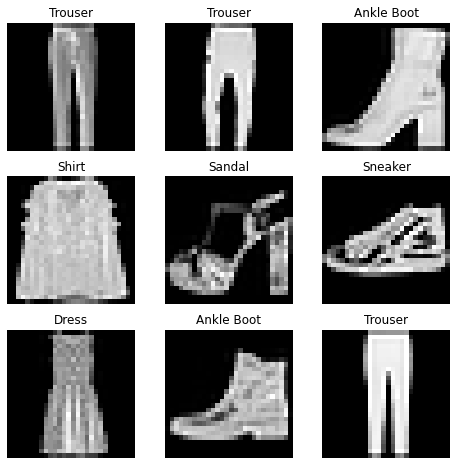

In [103]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Preparing your data for training with DataLoaders

In [104]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate through the DataLoader

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


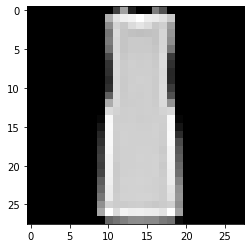

Label: 3


In [105]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# TRANSFORMS

Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels - that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

In [106]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In the above code snippet, 

# ToTensor() 

ToTensor converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]


# Lambda Transforms
Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter_ which assigns a value=1 on the index as given by the label y.

# BUILD THE NEURAL NETWORK

Neural networks comprise of layers/modules that perform operations on data. The torch.nn namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

In the following sections, we’ll build a neural network to classify images in the FashionMNIST dataset.

In [107]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


# Define the Class

In [108]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of NeuralNetwork, and move it to the device, and print its structure.

In [109]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call model.forward() directly!

Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class. We get the prediction probabilities by passing it through an instance of the nn.Softmax module.

In [110]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1], device='cuda:0')


# Model Layers

Let’s break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network.

In [111]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


**nn.Flatten**

We initialize the nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [112]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


**nn.Linear**

The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

In [113]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


**nn.ReLU**

Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In this model, we use nn.ReLU between our linear layers, but there’s other activations to introduce non-linearity in your model.

In [114]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.3887,  0.4230,  0.1792, -0.2481, -0.1089, -0.0030, -0.2677,  0.0391,
          0.2143, -0.4431, -0.0249, -0.3904, -0.7609, -0.0577, -0.1215, -0.0171,
         -0.1825,  0.0876, -0.2504, -0.5587],
        [-0.4935,  0.2806, -0.1377, -0.6552, -0.0926, -0.5043, -0.5841, -0.2061,
          0.1922, -0.4638, -0.2151, -0.1676, -0.2290,  0.0106, -0.3418, -0.2719,
          0.2227, -0.0966, -0.4514, -0.2504],
        [-0.1467, -0.2235, -0.0733, -0.0480, -0.2717, -0.1720, -0.9468,  0.1879,
          0.1975, -0.4476, -0.2334, -0.6219, -0.4704, -0.0245, -0.2522, -0.0343,
         -0.3850, -0.1423, -0.0127, -0.4060]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.4230, 0.1792, 0.0000, 0.0000, 0.0000, 0.0000, 0.0391, 0.2143,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0876,
         0.0000, 0.0000],
        [0.0000, 0.2806, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1922,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0106, 0.00

**nn.Sequential**

nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [115]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

**nn.Softmax**

The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

In [116]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

**Model Parameters**

Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.

In [117]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0310,  0.0047, -0.0031,  ...,  0.0243, -0.0065,  0.0223],
        [ 0.0286, -0.0351, -0.0187,  ...,  0.0232,  0.0065,  0.0330]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0353, 0.0299], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0428, -0.0222,  0.0003,  ..., -0.0360, -0.0151, -0.0046],
        [-0.0434,  0.0161,  0.0394,  ..., -0.0358, -0.0277, -0.0054]],
       device='cuda:0', grad_fn=<Sl

# AUTOMATIC DIFFERENTIATION WITH TORCH.AUTOGRAD

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:

In [118]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

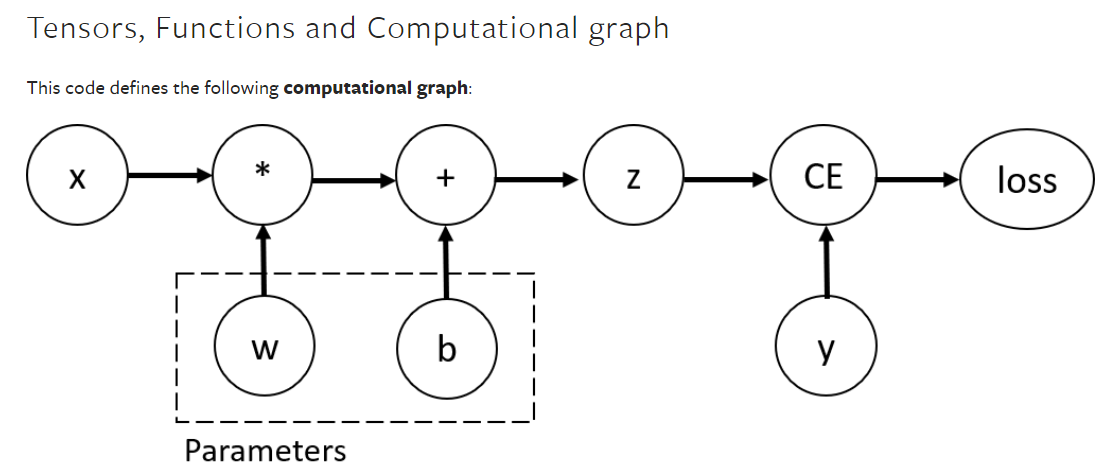

In this network, w and b are parameters, which we need to optimize. Thus, we need to be able to compute the gradients of loss function with respect to those variables. In order to do that, we set the requires_grad property of those tensors.

In [119]:
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f0434da0450>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f0434d96210>


# Computing Gradients

Computing Gradients
To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, namely, we need $\frac{\partial loss}{\partial w}$ and $\frac{\partial loss}{\partial b} $
under some fixed values of x and y. To compute those derivatives, we call loss.backward(), and then retrieve the values from w.grad and b.grad:

In [120]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1841, 0.0185, 0.3105],
        [0.1841, 0.0185, 0.3105],
        [0.1841, 0.0185, 0.3105],
        [0.1841, 0.0185, 0.3105],
        [0.1841, 0.0185, 0.3105]])
tensor([0.1841, 0.0185, 0.3105])


# Disabling Gradient Tracking

By default, all tensors with requires_grad=True are tracking their computational history and support gradient computation. However, there are some cases when we do not need to do that, for example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do forward computations through the network. We can stop tracking computations by surrounding our computation code with torch.no_grad() block:

In [121]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Another way to achieve the same result is to use the detach() method on the tensor:

In [122]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:
To mark some parameters in your neural network as frozen parameters. This is a very common scenario for finetuning a pretrained network
To speed up computations when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

# OPTIMIZING MODEL PARAMETERS


**Hyperparameters**

Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates (read more about hyperparameter tuning)

We define the following hyperparameters for training:
1.   Number of Epochs - the number times to iterate over the dataset
2.   Batch Size - the number of data samples propagated through the network before the parameters are updated
3.   Learning Rate - how much to update models parameters at each batch/epoch. 

Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [123]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

# Optimization Loop
Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an epoch.

Each epoch consists of two main parts:

1.   **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters. 
2.   **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let’s briefly familiarize ourselves with some of the concepts used in the training loop. Jump ahead to see the Full Implementation of the optimization loop.


# Loss Function
When presented with some training data, our untrained network is likely not to give the correct answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include **nn.MSELoss**(Mean Square Error) for regression tasks, and **nn.NLLLoss** (Negative Log Likelihood) for classification. 

**nn.CrossEntropyLoss** combines nn.LogSoftmax and nn.NLLLoss.

We pass our model’s output logits to nn.CrossEntropyLoss, which will normalize the logits and compute the prediction error.

In [124]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer

Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the SGD optimizer; additionally, there are many different optimizers available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

In [125]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:

*   Call optimizer.zero_grad() to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.

*   Backpropagate the prediction loss with a call to loss.backward(). PyTorch deposits the gradients of the loss w.r.t. each parameter.

*   Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.


# Prerequisite Code

We load the code from the previous sections on Datasets & DataLoaders and Build Model.

In [126]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

# Full Implementation

We define train_loop that loops over our optimization code, and test_loop that evaluates the model’s performance against our test data.

In [127]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to train_loop and test_loop. Feel free to increase the number of epochs to track the model’s improving performance.

In [128]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.308574  [    0/60000]
loss: 2.294995  [ 6400/60000]
loss: 2.275623  [12800/60000]
loss: 2.266422  [19200/60000]
loss: 2.252425  [25600/60000]
loss: 2.218618  [32000/60000]
loss: 2.229095  [38400/60000]
loss: 2.193177  [44800/60000]
loss: 2.195484  [51200/60000]
loss: 2.164889  [57600/60000]
Test Error: 
 Accuracy: 47.1%, Avg loss: 2.156276 

Epoch 2
-------------------------------
loss: 2.174740  [    0/60000]
loss: 2.161697  [ 6400/60000]
loss: 2.100906  [12800/60000]
loss: 2.110583  [19200/60000]
loss: 2.069905  [25600/60000]
loss: 2.003368  [32000/60000]
loss: 2.038958  [38400/60000]
loss: 1.959244  [44800/60000]
loss: 1.970924  [51200/60000]
loss: 1.902657  [57600/60000]
Test Error: 
 Accuracy: 53.8%, Avg loss: 1.893633 

Epoch 3
-------------------------------
loss: 1.936060  [    0/60000]
loss: 1.902843  [ 6400/60000]
loss: 1.782731  [12800/60000]
loss: 1.816279  [19200/60000]
loss: 1.720310  [25600/60000]
loss: 1.663735  [32000/600

# SAVE AND LOAD THE MODEL

we will look at how to persist model state with saving, loading and running model predictions.

In [129]:
import torch
import torchvision.models as models

**Saving and Loading Model Weights**

PyTorch models store the learned parameters in an internal state dictionary, called state_dict. These can be persisted via the torch.save method:

In [130]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

To load model weights, you need to create an instance of the same model first, and then load the parameters using load_state_dict() method.

In [131]:
model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**Saving and Loading Models with Shapes**

When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass model (and not model.state_dict()) to the saving function:

In [132]:
torch.save(model, 'model.pth')

We can then load the model like this:

In [133]:
model = torch.load('model.pth')

# **TensorFlow Coder (TF-Coder): A program synthesis tool for TensorFlow expressions**

In [134]:
#@title Run this cell after making your choices.

allow_data_collection = True  #@param {type: "boolean"}
include_in_dataset = True  #@param {type: "boolean"}

if allow_data_collection:
  if include_in_dataset:
    print('Usage data may be collected and released in a public dataset.')
  else:
    print('Usage data may be collected but will not be publicly released.')
else:
  print('Usage data will not be collected.')

Usage data may be collected and released in a public dataset.


Step 1: Installs and imports

In [135]:
#@title Run this cell to install and import TF-Coder.

ready = True
try:
  _ = (allow_data_collection, include_in_dataset)
except NameError as e:
  print('Please run the cell in Step 0 first.')
  ready = False

if ready:
  # Import TensorFlow and NumPy in case the user wants to create the example
  # programmatically.
  import tensorflow as tf
  import numpy as np
  
  !pip install tensorflow-coder
  from tf_coder.value_search import colab_interface
  from tf_coder.value_search import value_search_settings as settings_module

  if allow_data_collection:
    !pip install tensorflow-coder-colab-logging
    from tf_coder_colab_logging import colab_logging

  from google.colab import output
  output.clear()

  print('Imports successful. Loading models...')
  colab_interface.warm_up()
  print('Done. TF-Coder is now ready to use!')

Imports successful. Loading models...
Done. TF-Coder is now ready to use!


Step 2: Describe the problem with an example

Provide an input-output example:

inputs is a dictionary containing one or more input tensors with variable names.
output is the corresponding output tensor.
Tensors can be provided as lists (possibly multidimensional) or tf.Tensor objects.

You may also specify relevant scalar constants. TF-Coder also uses heuristics to guess a few useful constants.

Finally, it often helps to provide an English description of the desired tensor manipulation. This description can help the tool decide which TensorFlow operations to prioritize.

Note: Please do not include confidential or personal information.

In [136]:
# Edit this cell! Follow the format of the example below.

# A dict mapping input variable names to input tensors.
inputs = {
    'rows': [10, 20, 30],
    'cols': [1, 2, 3, 4],
}

# The corresponding output tensor.
output = [[11, 12, 13, 14],
          [21, 22, 23, 24],
          [31, 32, 33, 34]]

# A list of relevant scalar constants, if any.
constants = []

# An English description of the tensor manipulation.
description = 'add two vectors with broadcasting to get a matrix'

Step 3: Run the TF-Coder tool

In [137]:
ready = True
try:
  _ = colab_interface
except NameError:
  print('Run the cell in Step 1 first.')
  ready = False
try:
  _ = (inputs, output, constants, description)
except NameError:
  print('Define the problem by running the cell in Step 2 first.')
  ready = False

#@markdown &nbsp;
#@markdown #### **Settings for TF-Coder**
#@markdown How long to search for a solution, in seconds.
time_limit = 60  #@param {type: "integer"}
#@markdown How many solutions to find before stopping. If more than 1, the entire search will slow down.
number_of_solutions = 1  #@param{type: "integer"}
#@markdown Whether solutions must use all inputs, at least one input, or no such requirement.
solution_requirement = "all inputs" #@param ["all inputs", "one input", "no restriction"]

settings = settings_module.from_dict({
    'timeout': time_limit,
    'only_minimal_solutions': False,
    'max_solutions': number_of_solutions,
    'require_all_inputs_used': solution_requirement == 'all inputs',
    'require_one_input_used': solution_requirement == 'one input',
})

if ready:
  if allow_data_collection:
    problem_id = colab_logging.get_uuid()
    colab_logging.log_problem(inputs, output, constants, description, settings,
                              include_in_dataset=include_in_dataset,
                              problem_id=problem_id)

  # Results will be printed to the cell's output.
  results = colab_interface.run_value_search_from_colab(
      inputs, output, constants, description, settings)

  if allow_data_collection:
    colab_logging.log_result(results,
                             include_in_dataset=include_in_dataset,
                             problem_id=problem_id)

<IPython.core.display.Javascript object>

Input 'rows':
tf.Tensor([10 20 30], shape=(3,), dtype=int32)

Input 'cols':
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)

Output:
tf.Tensor(
[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]], shape=(3, 4), dtype=int32)

Constants: [0, 1, -1, True, False, 3, 4]

Description: add two vectors with broadcasting to get a matrix

Searching...

Found solution: tf.add(cols, tf.expand_dims(rows, 1))

Solution was found in 0.6 seconds:
tf.add(cols, tf.expand_dims(rows, 1))


<IPython.core.display.Javascript object>

Example problems that TF-Coder can solve

In [138]:
# Real task encountered by a Googler.
inputs = {
    'tensor': [[0, 1, 0, 0],
               [0, 1, 1, 0],
               [1, 1, 1, 1]],
}
output = [[0.0, 1.0, 0.0, 0.0],
          [0.0, 0.5, 0.5, 0.0],
          [0.25, 0.25, 0.25, 0.25]]
constants = []
description = 'normalize the rows of a tensor'

In [139]:
ready = True
try:
  _ = colab_interface
except NameError:
  print('Run the cell in Step 1 first.')
  ready = False
try:
  _ = (inputs, output, constants, description)
except NameError:
  print('Define the problem by running the cell in Step 2 first.')
  ready = False

#@markdown &nbsp;
#@markdown #### **Settings for TF-Coder**
#@markdown How long to search for a solution, in seconds.
time_limit = 60  #@param {type: "integer"}
#@markdown How many solutions to find before stopping. If more than 1, the entire search will slow down.
number_of_solutions = 1  #@param{type: "integer"}
#@markdown Whether solutions must use all inputs, at least one input, or no such requirement.
solution_requirement = "all inputs" #@param ["all inputs", "one input", "no restriction"]

settings = settings_module.from_dict({
    'timeout': time_limit,
    'only_minimal_solutions': False,
    'max_solutions': number_of_solutions,
    'require_all_inputs_used': solution_requirement == 'all inputs',
    'require_one_input_used': solution_requirement == 'one input',
})

if ready:
  if allow_data_collection:
    problem_id = colab_logging.get_uuid()
    colab_logging.log_problem(inputs, output, constants, description, settings,
                              include_in_dataset=include_in_dataset,
                              problem_id=problem_id)

  # Results will be printed to the cell's output.
  results = colab_interface.run_value_search_from_colab(
      inputs, output, constants, description, settings)

  if allow_data_collection:
    colab_logging.log_result(results,
                             include_in_dataset=include_in_dataset,
                             problem_id=problem_id)

<IPython.core.display.Javascript object>

Input 'tensor':
tf.Tensor(
[[0 1 0 0]
 [0 1 1 0]
 [1 1 1 1]], shape=(3, 4), dtype=int32)

Output:
tf.Tensor(
[[0.   1.   0.   0.  ]
 [0.   0.5  0.5  0.  ]
 [0.25 0.25 0.25 0.25]], shape=(3, 4), dtype=float32)

Constants: [0, 1, -1, True, False, 3, 4]

Description: normalize the rows of a tensor

Searching...

Found solution: tf.cast(tf.divide(tensor, tf.expand_dims(tf.reduce_sum(tensor, axis=1), 1)), tf.float32)

Solution was found in 25.3 seconds:
tf.cast(tf.divide(tensor, tf.expand_dims(tf.reduce_sum(tensor, axis=1), 1)), tf.float32)


<IPython.core.display.Javascript object>

# **EINSUM Practice**

Refering an interesting [Yt link](https://www.youtube.com/watch?v=pkVwUVEHmfI) for practice

In [140]:
import torch

x = torch.rand((2,3))
x

tensor([[0.9660, 0.5226, 0.7053],
        [0.3434, 0.0438, 0.2808]])

**Permutation of tensors**

In [141]:
torch.einsum("ij->ji",x)

tensor([[0.9660, 0.3434],
        [0.5226, 0.0438],
        [0.7053, 0.2808]])

**Summation**

In [142]:
torch.einsum("ij->",x)

tensor(2.8618)

**Column summation**

In [143]:
torch.einsum("ij->j",x)

tensor([1.3094, 0.5664, 0.9861])

**Row summation**

In [144]:
torch.einsum("ij->i",x)

tensor([2.1939, 0.6679])

**Matrix Vector Multiplication**

In [145]:
v = torch.rand((1,3))
print(v)



tensor([[0.3154, 0.9562, 0.0356]])


In [146]:
x

tensor([[0.9660, 0.5226, 0.7053],
        [0.3434, 0.0438, 0.2808]])

In [147]:
torch.einsum("ij,kj->ik",x,v)

tensor([[0.8295],
        [0.1602]])

**Matrix Matrix Multiplication**

In [148]:
torch.einsum("ij,kj->ik",x,x)

tensor([[1.7037, 0.5526],
        [0.5526, 0.1987]])

**Dot Product first row with first row of matrix**

In [149]:
torch.einsum("i,i->",x[0],x[0])

tensor(1.7037)

**Dot Product with Matrix**




In [150]:
torch.einsum("ij,ij->",x,x)

tensor(1.9023)

**Hadamard Product (Element wise Multiplication)**

In [151]:
torch.einsum("ij,ij->ij",x,x)

tensor([[0.9331, 0.2731, 0.4975],
        [0.1179, 0.0019, 0.0788]])

**Outer product**

In [152]:
a = torch.rand((3))
b = torch.rand((5))
print(a)
print(b)
torch.einsum("i,j->ij",a,b)

tensor([0.9606, 0.7727, 0.4486])
tensor([0.0213, 0.2193, 0.9524, 0.7093, 0.3171])


tensor([[0.0205, 0.2106, 0.9149, 0.6814, 0.3046],
        [0.0165, 0.1694, 0.7360, 0.5481, 0.2451],
        [0.0096, 0.0984, 0.4273, 0.3182, 0.1423]])

**Batch Matrix Multiplication**

In [153]:
a = torch.rand((3,2,5))
b = torch.rand((3,5,3))

print(a)
print(b)

torch.einsum("ijk,ikl->ijl",a,b)

tensor([[[0.9129, 0.0975, 0.0187, 0.3132, 0.1065],
         [0.8105, 0.6993, 0.4080, 0.1301, 0.2807]],

        [[0.0148, 0.9457, 0.2273, 0.5263, 0.4116],
         [0.1749, 0.0314, 0.2471, 0.9124, 0.6708]],

        [[0.7017, 0.9540, 0.2020, 0.7245, 0.1214],
         [0.7503, 0.4735, 0.6750, 0.2696, 0.8344]]])
tensor([[[0.8059, 0.0773, 0.2180],
         [0.5442, 0.7785, 0.4879],
         [0.0542, 0.5711, 0.6976],
         [0.5067, 0.6231, 0.9612],
         [0.3918, 0.6638, 0.6542]],

        [[0.2462, 0.3684, 0.6337],
         [0.1430, 0.3872, 0.9665],
         [0.0304, 0.2003, 0.6481],
         [0.8389, 0.2866, 0.4387],
         [0.2554, 0.6849, 0.2357]],

        [[0.7055, 0.5123, 0.8511],
         [0.4156, 0.1617, 0.9635],
         [0.4162, 0.3792, 0.9958],
         [0.3052, 0.0898, 0.7758],
         [0.7848, 0.9121, 0.6994]]])


tensor([[[0.9902, 0.4230, 0.6304],
         [1.2318, 1.1075, 1.1112]],

        [[0.6924, 0.8498, 1.3987],
         [0.9918, 0.8470, 0.8598]],

        [[1.2921, 0.7662, 2.3645],
         [1.7443, 1.5023, 2.5597]]])

**Matrix Diagonal**

In [154]:
x = torch.rand((3,3))
torch.einsum("ii->i",x)

tensor([0.2559, 0.8887, 0.8174])

**Matrix Trace**

In [155]:
torch.einsum("ii->",x)

tensor(1.9620)